<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [138]:
#ваш код здесь
hh_data = pd.read_csv("dst-3.0_16_1_hh_database.csv", sep=";")
display(hh_data)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано
...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [139]:
#ваш код здесь
display(hh_data.head())
hh_data.tail()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [140]:
print(hh_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [141]:
#ваш код здесь
hh_data.count()
missing = hh_data.isnull().sum()  
cols_with_missing = missing[missing > 0].index.tolist()
print(f"колонки, где есть пропуски", cols_with_missing)


колонки, где есть пропуски ['Опыт работы', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность']


5. Выведите основную статистическую информацию о столбцах.


In [142]:
#ваш код здесь
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [143]:
#ваш код здесь
hh_df = hh_data.copy()
def map_education(text):
    first_three_words = ' '.join(text.split()[:3])
    if 'Высшее образование' in first_three_words:
        return 'высшее'
    elif 'Неоконченное высшее' in first_three_words:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in first_three_words:
        return 'среднее специальное'
    elif 'Среднее' in first_three_words:
        return 'среднее'
    else:
        return 'другое'

hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(map_education)
hh_df.drop(columns=['Образование и ВУЗ'], inplace=True)

print(hh_df['Образование'].unique())

count_middle_education = (hh_df['Образование'] == 'среднее').sum()
print(f"Количество соискателей со средним образованием: {count_middle_education}")


['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']
Количество соискателей со средним образованием: 559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [144]:
#ваш код здесь

hh_df[['Пол', 'Возраст', 'Дата рождения']] = hh_df['Пол, возраст'].str.split(' , ', expand=True)

hh_df['Пол'] = hh_df['Пол'].map({'Мужчина': 'М', 'Женщина': 'Ж'})

hh_df['Возраст'] = hh_df['Возраст'].str.extract(r'(\d+)').astype(int)

hh_df.drop(columns=['Пол, возраст', 'Дата рождения'], inplace=True)

print(hh_df['Пол'].value_counts(normalize=True) * 100)
print(hh_df['Возраст'].mean())  



Пол
М    80.929287
Ж    19.070713
Name: proportion, dtype: float64
32.19674146254246


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [145]:

def experience_to_months(experience_text):
    if pd.isna(experience_text):
        return np.nan
        
    text = str(experience_text).strip().lower()
    
    if text in ['не указано', '']:
        return 0

    match = re.search(r'Опыт работы (\d+)\s+(год|года|лет) (\d+)\s*(месяц|месяца|месяцев)', text, flags=re.IGNORECASE)

    if match != None:
        years = match.group(1)
        months = match.group(3)

        return int(years) * 12 + int(months)

    match = re.search(r'Опыт работы (\d+)\s+(год|года|лет)', text, flags=re.IGNORECASE)

    if match != None:
        years = match.group(1)
        
        return int(years) * 12

    match = re.search(r'Опыт работы (\d+)\s*(месяц|месяца|месяцев)', text, flags=re.IGNORECASE)

    if match != None:
        months = match.group(1)
        
        return int(months)

    return np.nan

hh_df['Опыт работы в месяцах'] = hh_df['Опыт работы'].apply(experience_to_months)

hh_df.drop(columns=['Опыт работы'], inplace=True)

median_exp = hh_df['Опыт работы в месяцах'].median()
print(f"Медианный опыт работы: {median_exp} месяцев")

max_exp = hh_df['Опыт работы в месяцах'].max()
print(f'Максимальный опыт работы: {max_exp} месяцев')

hh_df['Опыт работы в месяцах'].info()

Медианный опыт работы: 100.0 месяцев
Максимальный опыт работы: 1188.0 месяцев
<class 'pandas.core.series.Series'>
RangeIndex: 44744 entries, 0 to 44743
Series name: Опыт работы в месяцах
Non-Null Count  Dtype  
--------------  -----  
44576 non-null  float64
dtypes: float64(1)
memory usage: 349.7 KB


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [146]:
#ваш код здесь
million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань',
                  'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 
                  'Красноярск', 'Пермь', 'Воронеж','Волгоград']

def city_info(text):
    parts = [part.strip() for part in text.split(',')]
    
    city = parts[0]
    if city == 'Москва':
        city_cat = 'Москва'
    elif city == 'Санкт-Петербург':
        city_cat = 'Санкт-Петербург'
    elif city in million_cities:
        city_cat = 'город-миллионник'
    else:
        city_cat = 'другие'
    
    move_text = ' '.join(parts[1:]) if len(parts) > 1 else ''
    move_ready = any(keyword in move_text.lower() for keyword in ['готов', 'готова', 'хочу переехать'])
    if any(neg in move_text.lower() for neg in ['не готов', 'не готова']):
        move_ready = False
    
    commute_ready = any(k in move_text.lower() for k in ['готов к командировкам', 'готова к командировкам', 'готова к редким командировкам', 'готов к редким командировкам'])
  
    if all(k not in move_text.lower() for k in ['командировкам', 'редким командировкам']):
        commute_ready = False
    
    return pd.Series([city_cat, move_ready, commute_ready])

hh_df[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = hh_df['Город, переезд, командировки'].apply(city_info)

hh_df.drop(columns=['Город, переезд, командировки'], inplace=True)

percent_spb = (hh_df['Город'] == 'Санкт-Петербург').mean()*100
percent_move_and_comm = (hh_df['Готовность к переезду'] & hh_df['Готовность к командировкам']).mean()*100

print(f"Процент соискателей из Санкт-Петербурга: {round(percent_spb)}%")
print(f"Процент соискателей, готовых к переездам и командировкам: {round(percent_move_and_comm)}%")


Процент соискателей из Санкт-Петербурга: 11%
Процент соискателей, готовых к переездам и командировкам: 32%


In [147]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Занятость                        44744 non-null  object 
 3   График                           44744 non-null  object 
 4   Последнее/нынешнее место работы  44743 non-null  object 
 5   Последняя/нынешняя должность     44742 non-null  object 
 6   Обновление резюме                44744 non-null  object 
 7   Авто                             44744 non-null  object 
 8   Образование                      44744 non-null  object 
 9   Пол                              44744 non-null  object 
 10  Возраст                          44744 non-null  int64  
 11  Опыт работы в месяцах            44576 non-null  float64
 12  Город             

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [148]:
#ваш код здесь
employment_dummies = hh_df['Занятость'].str.get_dummies(sep=', ').astype(bool)
employment_dummies.columns = [col.strip() for col in employment_dummies.columns]

schedule_dummies = hh_df['График'].str.get_dummies(sep=', ').astype(bool)
schedule_dummies.columns = [col.strip() for col in schedule_dummies.columns]

hh_df = pd.concat([hh_df, employment_dummies, schedule_dummies], axis=1)

hh_df = hh_df.drop(columns=['Занятость', 'График'])

if 'проектная работа' in employment_dummies.columns and 'волонтерство' in employment_dummies.columns:
    project_and_volunteer = ((employment_dummies['проектная работа'] == True) & 
                            (employment_dummies['волонтерство'] == True)).sum()
    print(f'\nЛюдей, которые ищут проектную работу и волонтерство: {project_and_volunteer}')
else:
    project_cols = [col for col in employment_dummies.columns if 'проект' in col.lower()]
    volunteer_cols = [col for col in employment_dummies.columns if 'волонтер' in col.lower()]
    
    if project_cols and volunteer_cols:
        project_and_volunteer = ((employment_dummies[project_cols[0]] == True) & 
                                (employment_dummies[volunteer_cols[0]] == True)).sum()
        print(f'\nЛюдей, которые ищут проектную работу и волонтерство: {project_and_volunteer}')
    else:
        print("Не найдены нужные столбцы")

if 'вахтовый метод' in schedule_dummies.columns and 'гибкий график' in schedule_dummies.columns:
    shift_and_flexible = ((schedule_dummies['вахтовый метод'] == True) & 
                         (schedule_dummies['гибкий график'] == True)).sum()
    print(f'Людей, которые хотят работать вахтовым методом и с гибким графиком: {shift_and_flexible}')
else:
    shift_cols = [col for col in schedule_dummies.columns if 'вахт' in col.lower()]
    flexible_cols = [col for col in schedule_dummies.columns if 'гибк' in col.lower()]
    
    if shift_cols and flexible_cols:
        shift_and_flexible = ((schedule_dummies[shift_cols[0]] == True) & 
                             (schedule_dummies[flexible_cols[0]] == True)).sum()
        print(f'Людей, которые хотят работать вахтовым методом и с гибким графиком: {shift_and_flexible}')
    else:
        print('Не найдены нужные столбцы')

categories = [
    'полная занятость',
    'частичная занятость',
    'проектная работа',
    'волонтерство',
    'полный день',
    'удаленная работа',
    'вахтовый метод',
    'гибкий график'
]

for cat in categories:
    if cat in hh_df.columns:
        hh_df[cat] = hh_df[cat].astype(bool)
    else:
        if 'Занятость' in hh_df.columns and hh_df['Занятость'].str.contains(cat).any():
            hh_df[cat] = hh_df['Занятость'].str.contains(cat, na=False)
        elif 'График' in hh_df.columns and hh_df['График'].str.contains(cat).any():
            hh_df[cat] = hh_df['График'].str.contains(cat, na=False)
        else:
            hh_df[cat] = False

print(hh_df[categories].sum())



Людей, которые ищут проектную работу и волонтерство: 436
Людей, которые хотят работать вахтовым методом и с гибким графиком: 2311
полная занятость       43284
частичная занятость    13136
проектная работа        8068
волонтерство             486
полный день            41716
удаленная работа       15022
вахтовый метод          3084
гибкий график          15584
dtype: int64


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [149]:
def get_salary_num(arg):
    salary = float(arg.split(' ')[0])
    return salary

def get_salary_currency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]
    
rates = pd.read_csv('ExchangeRates.csv')
rates['date'] = pd.to_datetime(rates['date'], format='%d/%m/%y', dayfirst=True).dt.date
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме'], dayfirst=True).dt.date
hh_df['ЗП (tmp)'] = hh_df['ЗП'].apply(get_salary_num)
hh_df['Курс (tmp)'] = hh_df['ЗП'].apply(get_salary_currency)
merged = hh_df.merge(
    rates, 
    left_on=['Курс (tmp)', 'Обновление резюме'],
    right_on=['currency', 'date',], 
    how='left'
)
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)
merged['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion']
hh_df = merged.drop(['ЗП', 'ЗП (tmp)', 'Курс (tmp)', 'currency', 'per', 'date', 'time', 'close', 'vol', 'proportion'], axis=1)
print(round(merged['ЗП (руб)'].median()/1000))

59


In [150]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы в месяцах            44576 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  волонтерство      

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

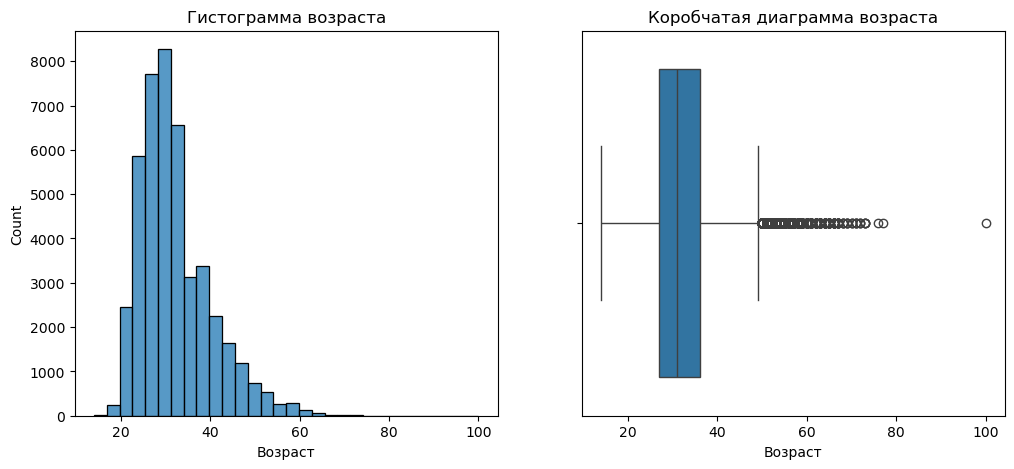

Модальное значение возраста соискателей: 30


In [151]:
# ваш код здесь

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(hh_df['Возраст'], bins=30, ax=axes[0])
axes[0].set_title('Гистограмма возраста')

sns.boxplot(x=hh_df['Возраст'], ax=axes[1])
axes[1].set_title('Коробчатая диаграмма возраста')

plt.show()

mode_age = hh_df['Возраст'].mode().iloc[0]
print(f'Модальное значение возраста соискателей: {mode_age}')


Гистограмма показывает распределение частоты возрастов соискателей. Здесь явно видно моду, наиболее часто встречающийся возраст в анкетах, самый высокий столбик. Также на гистограмме видно интервал возрастов соискателей. Наибольшее количество резюме заполнили люди от 20 до примерно 42 лет, самая активная рабочая сила. По форме гистограммы виден перекос в сторону более молодого активного возраста.

Коробчатая диаграмма позволяет увидеть выбросы, спецефические данные. Например, есть один соискатель в возрасте 100 лет, что может говорить о том, что человек по ошибке или намеренно ввел большой возраст. Начиная с 50 лет наблюдается уменьшение количества анкет от соискателей

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

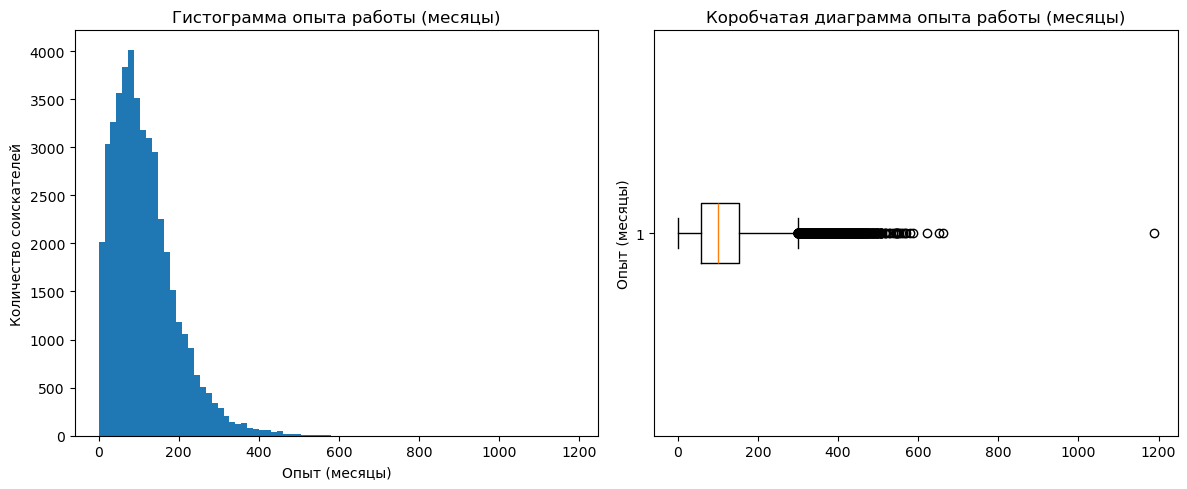

Максимальный опыт работы: 1188.0 месяцев
Модальное знаечние: 0    81.0
Name: Опыт работы в месяцах, dtype: float64
Большинство соискателей имеет опыт в интервале: от 57 до 154 месяцев
Верхняя граница: 299.50
Количество выбросов-аномалий:1276
<class 'pandas.core.series.Series'>
RangeIndex: 44744 entries, 0 to 44743
Series name: Опыт работы в месяцах
Non-Null Count  Dtype  
--------------  -----  
44576 non-null  float64
dtypes: float64(1)
memory usage: 349.7 KB


In [152]:

exp = hh_df['Опыт работы в месяцах'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(exp, bins=80)
axes[0].set_title('Гистограмма опыта работы (месяцы)')
axes[0].set_xlabel('Опыт (месяцы)')
axes[0].set_ylabel('Количество соискателей')

axes[1].boxplot(exp, vert=False)
axes[1].set_title('Коробчатая диаграмма опыта работы (месяцы)')
axes[1].set_ylabel('Опыт (месяцы)')

plt.tight_layout()
plt.show()


max_val = exp.max()                  
q25 = exp.quantile(0.25)             
q75 = exp.quantile(0.75)            
IQR = q75 -q25
upper_limit = q75+1.5*IQR

outliers = exp[exp>upper_limit]
outliers_count = outliers.count()

print(f'Максимальный опыт работы: {max_val} месяцев')
print(f'Модальное знаечние: {exp.mode()}')
print(f'Большинство соискателей имеет опыт в интервале: от {q25:.0f} до {q75:.0f} месяцев')
print(f'Верхняя граница: {upper_limit:.2f}')
print(f'Количество выбросов-аномалий:{outliers_count}')
hh_df['Опыт работы в месяцах'].info()

ваши выводы здесь
Мода распределения равна 81 месяцу, это наиболее встречающийся опыт. 
Предельные значения признака опыта работы большинства соискателей находятся в пределах от 57 до 154 месяцев.
Есть аномалии, самая крупная из них - 1188 месяцев. 

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


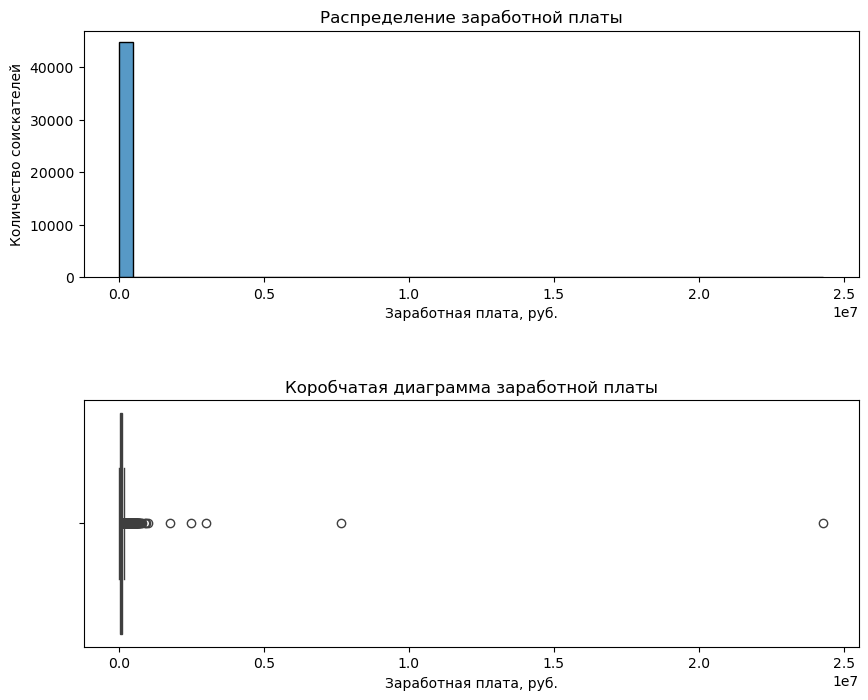

5
Минимальная зарплата: 1.0
Максимальная зарплата: 24304876.0
Большинство зарплат в интервале: (np.float64(37082.2), np.float64(95000.0))
Аномалии: [250000. 260000. 250000. ... 200000. 200000. 220000.]


In [153]:
# ваш код здесь
salary = hh_df['ЗП (руб)'].dropna()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=hh_df['ЗП (руб)'],
    bins=50,
    kde=False,
    ax=axes[0],
)
axes[0].set_title('Распределение заработной платы')
axes[0].set_xlabel('Заработная плата, руб.')
axes[0].set_ylabel('Количество соискателей')

sns.boxplot(
    data=hh_df,
    x='ЗП (руб)',
    orient='h',
    width=0.9,
    ax=axes[1],
)
axes[1].set_title('Коробчатая диаграмма заработной платы')
axes[1].set_xlabel('Заработная плата, руб.')

plt.subplots_adjust(hspace=0.5)
plt.show()

min_salary = salary.min()
max_salary = salary.max()
q1 = salary.quantile(0.25)
q3 = salary.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = salary[(salary < lower_bound) | (salary > upper_bound)]
count_above_million = (salary > 1000000).sum()

print(count_above_million)
print(f'Минимальная зарплата: {min_salary}')
print(f'Максимальная зарплата: {max_salary}')
print(f'Большинство зарплат в интервале: {q1, q3}')
print(f'Аномалии: {outliers.values}')

Гисограмма сосредоточена слева с длинным хвостом справа, который говорит о выбросах. Большинство соискателей расположены в одном диапазоне зарплат от 37082 до 95000 р.
Коробчатая диаграмма сплющена из-за большого количества выбросов. Особенно экстремальный выброс находится близко к 25 млн


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

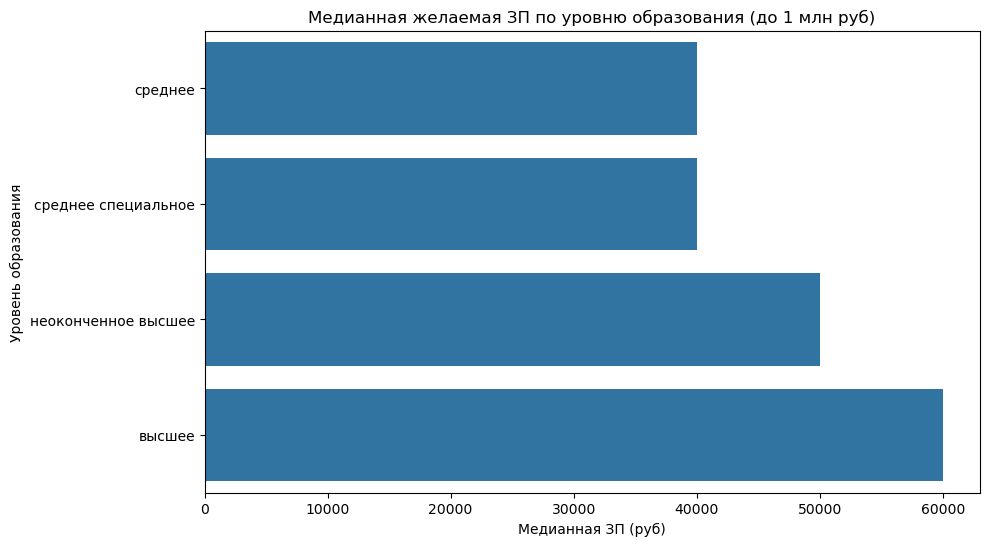

In [154]:
# ваш код здесь
filtered_df = hh_df[hh_df['ЗП (руб)'] < 1000000]

median_salary_by_edu = filtered_df.groupby('Образование')['ЗП (руб)'].median().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=median_salary_by_edu.values, y=median_salary_by_edu.index)
plt.xlabel('Медианная ЗП (руб)')
plt.ylabel('Уровень образования')
plt.title('Медианная желаемая ЗП по уровню образования (до 1 млн руб)')
plt.show()


ваши выводы здесь
наименьший уровень желаемой заработной платы наблюдается для соискателей со средним и средним специальным образованием. Наивысший уровень - для соискателей с высшим образованием. Таким образом признак уровня образования важен при прогнозировании заработной платы

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

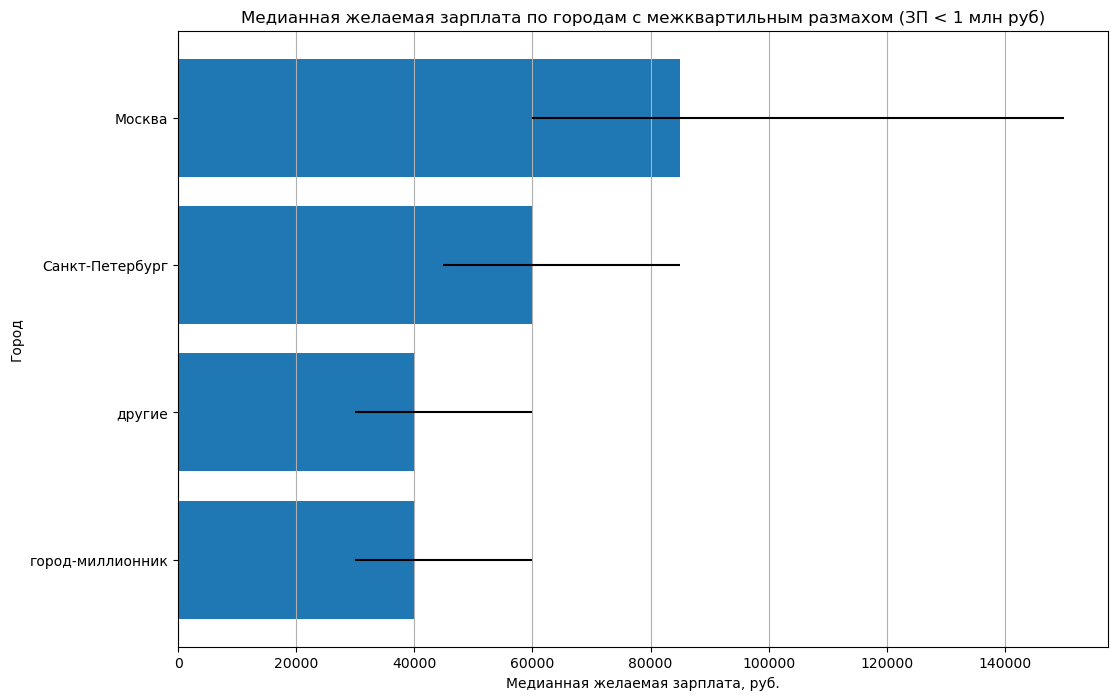

Город
Москва              900000.0
Санкт-Петербург     645171.0
город-миллионник    511681.6
другие              923983.0
Name: ЗП (руб), dtype: float64


In [155]:
# ваш код здесь

filtered_df = hh_df[hh_df['ЗП (руб)'] < 1000000]

grouped = filtered_df.groupby('Город')['ЗП (руб)']
median_salary = grouped.median()
median_salary_by_city = filtered_df.groupby('Город')['ЗП (руб)'].median().sort_values()
q1 = grouped.quantile(0.25)
q3 = grouped.quantile(0.75)

salary_stats = median_salary.to_frame('median').join(q1.to_frame('q1')).join(q3.to_frame('q3'))
salary_stats = salary_stats.sort_values('median')

plt.figure(figsize=(12, 8))
plt.barh(salary_stats.index, salary_stats['median'], xerr=[salary_stats['median'] - salary_stats['q1'], salary_stats['q3'] - salary_stats['median']])
plt.xlabel('Медианная желаемая зарплата, руб.')
plt.ylabel('Город')
plt.title('Медианная желаемая зарплата по городам с межквартильным размахом (ЗП < 1 млн руб)')
plt.grid(axis='x')
plt.show()
print(grouped.max())


ваши выводы здесь
Медианные уровни желаемой заработной платы и их размах в городах зависит от категории города. В Москве и Санкт-Петербурге медианные ЗП выше, чем в городах миллиониках и других городах.
Признак города при прогнозировании заработной  показыавает различия в уровнях жизни в разных городах и рынке труда. 
Межквартильный размах показывает разброс средних 50% значений зарплат внутри каждого города: в городах-миллионниках и других городах размах достаточно узкий, что говорит о более однородном уровне зарплат среди соискателей.В Москве и Санкт-Петербурге размах широкий - видно существенные различия доходов, возможное наличие как низкооплачиваемых, так и высокооплачиваемых позиций.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

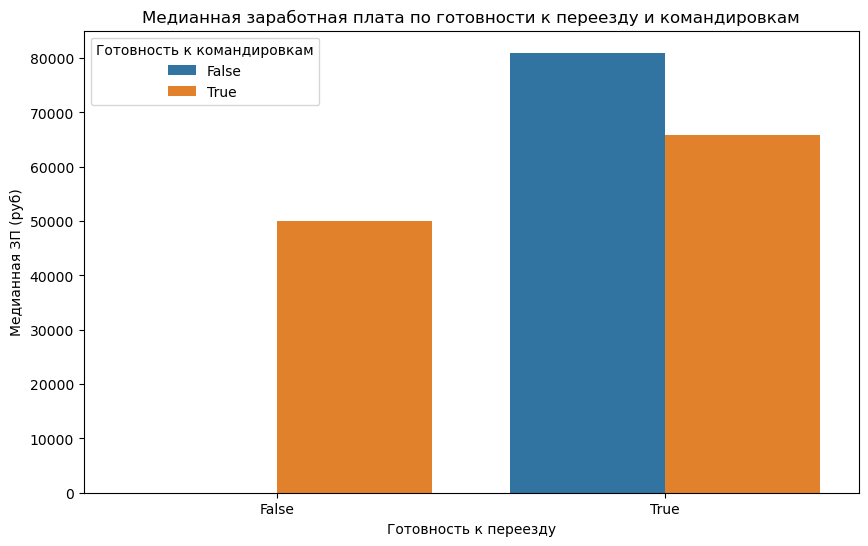

Медианная ЗП (готовы к переезду и командировкам): 65849 руб.


In [156]:
# ваш код здесь
grouped = hh_df.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='Готовность к переезду', y='ЗП (руб)', hue='Готовность к командировкам')
plt.title('Медианная заработная плата по готовности к переезду и командировкам')
plt.ylabel('Медианная ЗП (руб)')
plt.show()
median = grouped[(grouped['Готовность к переезду'] == True) & (grouped['Готовность к командировкам'] == True)]['ЗП (руб)'].values[0]

print(f"Медианная ЗП (готовы к переезду и командировкам): {median:.0f} руб.")


ваши выводы здесь
Среди не готовых к переезду медианная зарплата есть только для тех, кто готов к командировкам, и она ниже, чем у всех остальных категорий.
Готовые к переезду и не готовые к командировкам, получают самую высокую медианную зарплату (примерно 81000 руб).
Готовые и к переезду, и к командировкам, имеют медианную зарплату в районе 66000 руб. 
Готовность к переезду повышает медианную зарплату, вне зависимости от готовности к командировкам.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Образование     высшее  неоконченное высшее  среднее  среднее специальное
Возраст                                                                  
14            60000.00                  NaN      NaN                  NaN
15                 NaN                  NaN  10000.0               2000.0
16           122582.49                  NaN      NaN              30000.0
17            90075.50              80000.0  44000.0              25000.0
18            30000.00              25000.0  35000.0              25151.0
...                ...                  ...      ...                  ...
72            75000.00                  NaN      NaN                  NaN
73            62500.00                  NaN      NaN                  NaN
76            45000.00                  NaN      NaN                  NaN
77            90000.00                  NaN      NaN                  NaN
100                NaN                  NaN      NaN              60000.0

[63 rows x 4 columns]


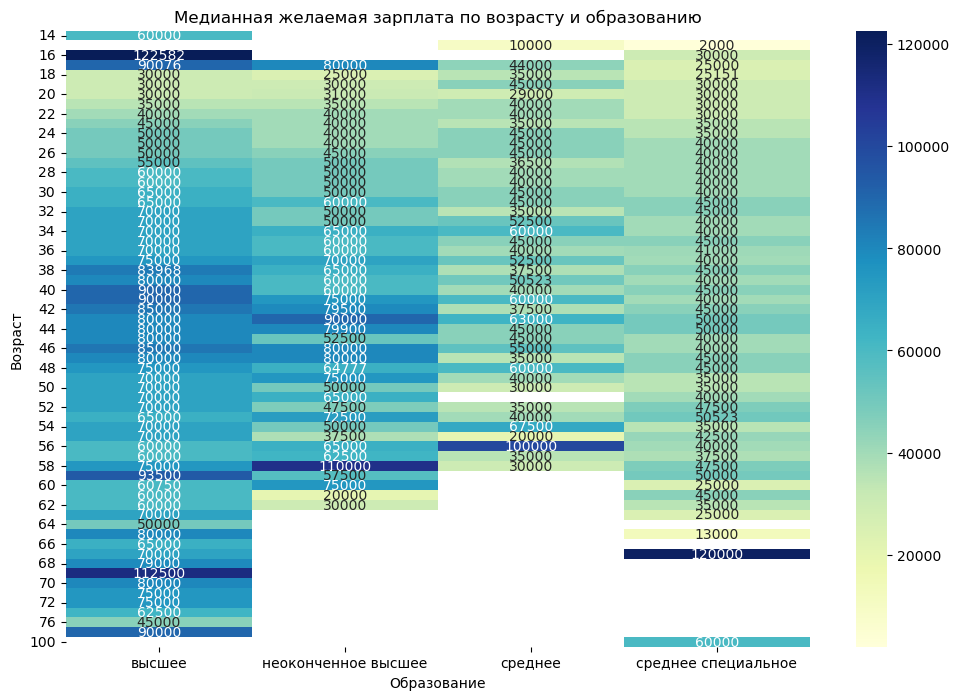

In [157]:
# ваш код здесь
pivot_table = hh_df.pivot_table(
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    aggfunc='median'
)
print(pivot_table)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Медианная желаемая зарплата по возрасту и образованию')
plt.ylabel('Возраст')
plt.xlabel('Образование')
plt.show()

ваши выводы здесь
Категория соискателей с высшим образованием имеет более насыщенный оттенок, что говорит о более высоком уровне зарплат по сравнению с остальными. Медианная зарплата здесь растет с возрастом, после 60 лет идет небольшой спад. ДЛя соискателей с неоконченным высшим образованием также наблюдается рост ЗП с возрастом, но в целом уровень зарплат ниже, чем для высшего. Для соискателей со средним и средним специальным образованием рост зарплат с возрастом незначительный, в целом сохраняется в небольшом диапаоне, что указывает на небольшие карьерные возможности. В возрастных группах младше 25 лет различия между образованием выражены меньше, так как опыта у всех немного.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

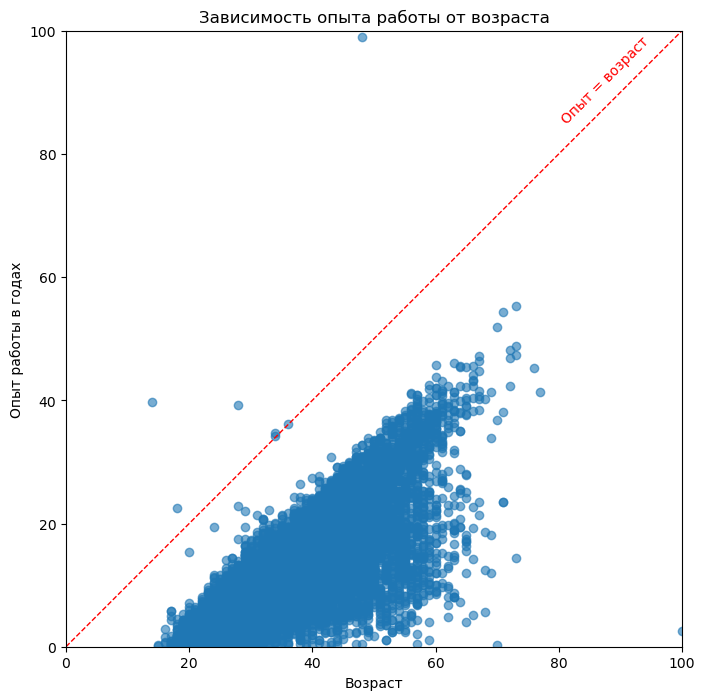

Количество аномалий: 7


In [194]:

hh_df['Опыт работы в годах'] = hh_df['Опыт работы в месяцах'] / 12

fig, ax = plt.subplots(figsize=(8, 8))  

ax.scatter(hh_df['Возраст'], hh_df['Опыт работы в годах'], alpha=0.6)

ax.plot([0, 100], [0, 100], 'r--', linewidth=1)

ax.text(80, 85, 'Опыт = возраст', color='red', rotation=45)

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect('equal', adjustable='box')  

ax.set_xlabel('Возраст')
ax.set_ylabel('Опыт работы в годах')
ax.set_title('Зависимость опыта работы от возраста')

plt.show()

anomaly_count = (hh_df['Опыт работы в годах'] > hh_df['Возраст']).sum()
print(f'Количество аномалий: {anomaly_count}')


In [158]:
# ваш код здесь. Интерактивный график
hh_df['Опыт работы в годах'] = hh_df['Опыт работы в месяцах'] / 12

fig = px.scatter(hh_df, x = 'Возраст', y = 'Опыт работы в годах',
                 opacity = 0.6,
                 title = 'Зависимость опыта работы от возраста',
                 labels = {'Возраст': 'Возраст', 'Опыт работы в годах': 'Опыт работы в годах'})

fig.add_shape(type='line',
              x0 = 0, y0 = 0, x1 = 100, y1 = 100,
              line = dict(color = 'Red', dash='dash'),
              xref = 'x', yref = 'y')

fig.add_annotation(x = 80, y = 85, xref = 'x', yref = 'y',
                   text = 'Опыт = возраст',
                   showarrow = False,
                   font = dict(color='Red'),
                   textangle = -45
                  )
fig.update_layout(
    width = 700,    
    height = 700,   
    margin = dict(l = 50, r = 50, b = 50, t = 50), 
    yaxis = dict(scaleanchor = "x", scaleratio = 1)
)

fig.write_html("html_plots/scatter_experience_vs_age.html")

fig.show()

anomaly_mask = hh_df['Опыт работы в годах'] > hh_df['Возраст']
anomaly_count = anomaly_mask.sum()
print(f'Количество аномалий: {anomaly_count}')


Количество аномалий: 7


ваши выводы здесь
Большинство соискателей - ниже линии возраста, нельзя иметь возраст меньше, чем опыт. Небольшая часть данных, которые лежат выше графика, - аномалии, которые могут быть связаны с неправильным вводом данных. Перед построением модели лучше очистить эти данные. Также видно, что возраст растет вместе с опытом


**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


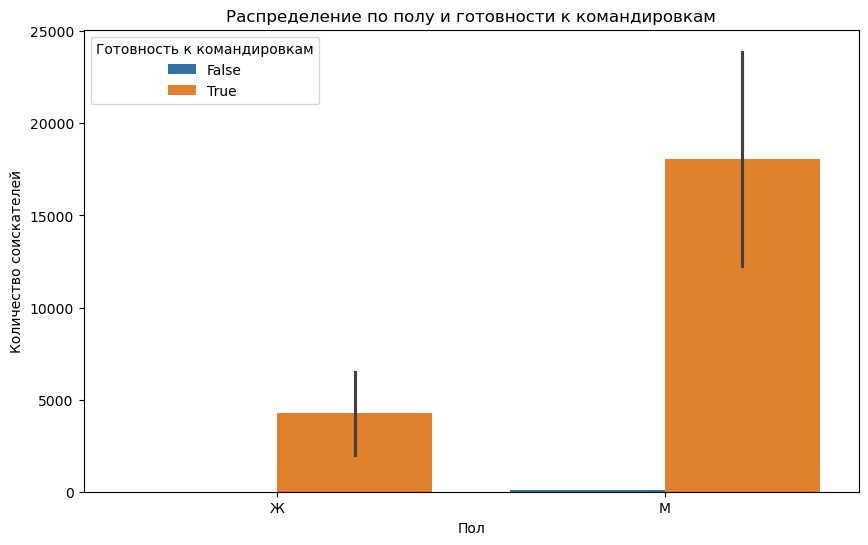

In [159]:
# ваш код здесь
grouped = hh_df.groupby(['Пол', 'Готовность к командировкам', 'Готовность к переезду']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='Пол', y='count', hue='Готовность к командировкам')

plt.title('Распределение по полу и готовности к командировкам')
plt.ylabel('Количество соискателей')
plt.xlabel('Пол')
plt.legend(title='Готовность к командировкам')
plt.show()


ваши выводы здесь
На графике распределения по полу и готовности к командировкам видно, что женщины меньше намерены ездить в командировки, чем мужчины

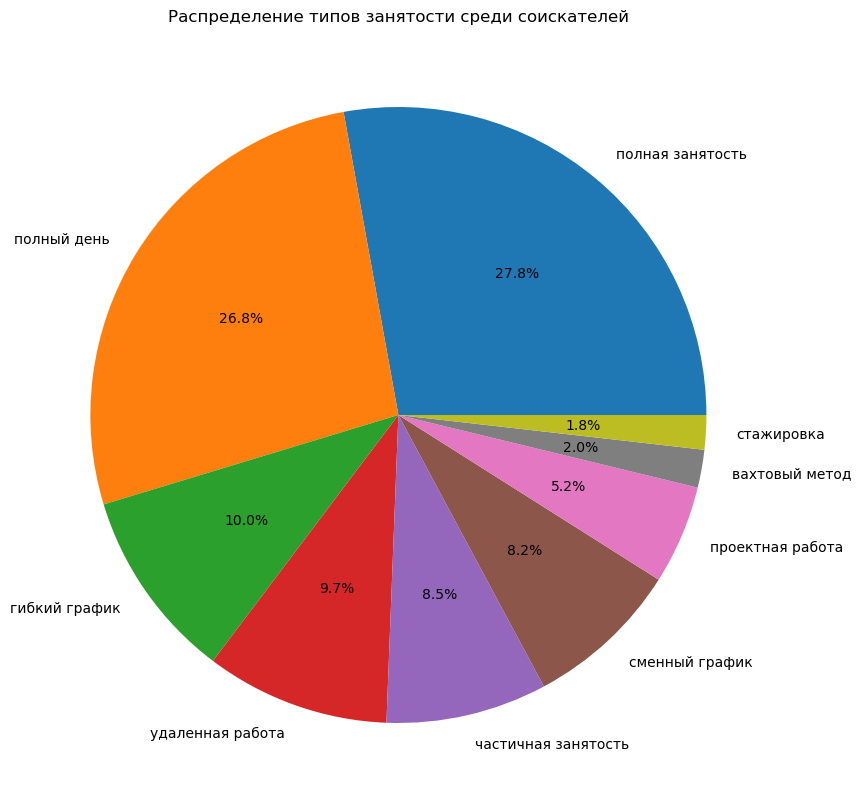

In [160]:
employment_types = ['полная занятость', 'проектная работа', 'стажировка', 'частичная занятость', 'вахтовый метод', 'гибкий график', 'полный день', 'сменный график', 'удаленная работа']

employment_counts = hh_df[employment_types].sum().sort_values(ascending=False)

plt.figure(figsize=(10,10))
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%')
plt.title('Распределение типов занятости среди соискателей')
plt.show()

Большей популярностью пользуются полная занятость и полный день. Такой тип занятости интересует больше половины соискателей. Меньше всего соискателей готовы на стажировку (меньше 2%) 

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [167]:
# ваш код здесь
num_duplicates = hh_df.duplicated().sum()
print(f"Количество полных дубликатов: {num_duplicates}")

hh_df_cleaned = hh_df.drop_duplicates()

Количество полных дубликатов: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [168]:
# ваш код здесь
missing = hh_df['Опыт работы в месяцах'].isna().sum()
print(f"Количество пропусков в столбце: {missing}")


Количество пропусков в столбце: 168


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [169]:
# ваш код здесь
hh_df = hh_df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

median_exp = hh_df['Опыт работы в месяцах'].median()
hh_df['Опыт работы в месяцах'].fillna(median_exp)
mean_exp = hh_df['Опыт работы в месяцах'].mean()

print('Средний опыт работы:', (mean_exp))

Средний опыт работы: 114.42082828554763


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [183]:
# ваш код здесь
outliers_mask = (hh_df['ЗП (руб)'] > 1000000) | (hh_df['ЗП (руб)'] < 1000)

num_outliers = outliers_mask.sum()
print(f'Количество выбросов: {num_outliers}')

hh_df_cleaned = hh_df[~outliers_mask]


Количество выбросов: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [190]:
# ваш код здесь
hh_df_cleaned = hh_df_cleaned.copy()
hh_df_cleaned['Опыт работы в годах'] = hh_df_cleaned['Опыт работы в месяцах'] / 12

anom_mask = hh_df_cleaned['Опыт работы в годах'] > hh_df_cleaned['Возраст']
anom_count = anom_mask.sum()
print(f'Количество аномалий: {anom_count}')
    
hh_df_mod = hh_df_cleaned[~anom_mask]


Количество аномалий: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

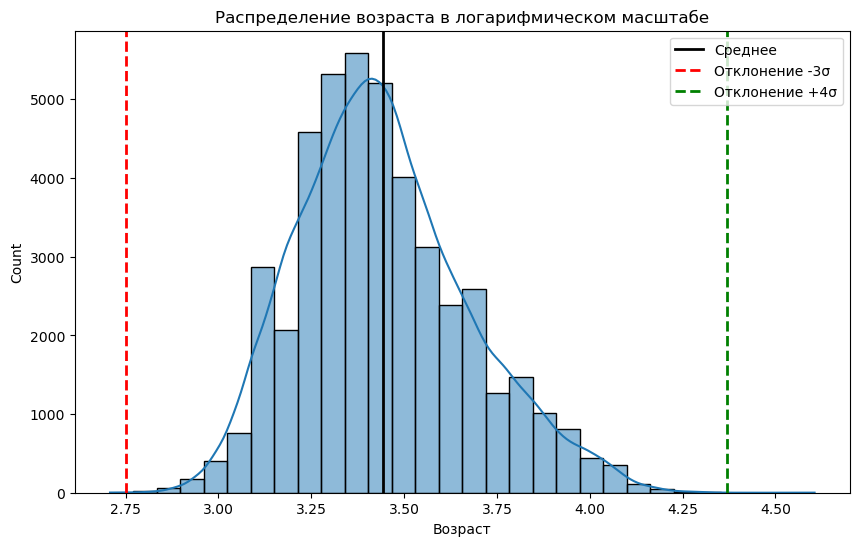

Число выбросов по возрасту: 3
Возраст выбросов:
       Возраст
31137       15
32950       15
33654      100
0.45278668633745545


In [191]:

log_age = np.log(hh_df_mod['Возраст'])

plt.figure(figsize=(10,6))
histplot = sns.histplot(log_age, bins=30, kde=True)

mean = log_age.mean()
std = log_age.std()

histplot.axvline(mean, color='k', lw=2, label='Среднее')
histplot.axvline(mean - 3*std, color='r', lw=2, linestyle='--', label='Отклонение -3σ')
histplot.axvline(mean + 4*std, color='g', lw=2, linestyle='--', label='Отклонение +4σ')

plt.title('Распределение возраста в логарифмическом масштабе')
plt.legend()
plt.show()

z_scores = (log_age - mean) / std
outliers_mask = (z_scores < -3) | (z_scores > 4)
outliers = hh_df_mod[outliers_mask]

print(f'Число выбросов по возрасту: {outliers.shape[0]}')
print('Возраст выбросов:')
print(outliers[['Возраст']])
print(log_age.skew())


После логарифмического преобразования распределение возраста приняло вид, близкий к нормальному. 
Это помогает лучше анализировать данные. Наличие выбросов с Z-оценками меньше -3 и больше +4 говорит о том, 
что в данных есть редкие случаи очень маленького и очень большого возраста по сравнению с остальными. На основе них можно проверить корректность данных и решить, нужно ли их очистить.
Асимметрия распределения правосторонняя, так как она положительная. Она важна для понимания степени остаточной асимметрии: 
здесь она близка к нулю, поэтому распределение близко к симметричному нормальному.